## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [44]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [45]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [46]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [47]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [48]:
(df.converted > 0).sum()

35237

e. The number of times the `new_page` and `treatment` don't line up.

In [49]:
df[(df.group == 'treatment') & (df.landing_page != 'new_page')].shape[0]

1965

f. Do any of the rows have missing values?

In [50]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.    


In [51]:
df2 = df[((df.group == 'treatment') & (df.landing_page == 'new_page')) | 
         (df.group == 'control') & (df.landing_page == 'old_page')]
df2.shape[0]

290585

In [52]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

a. How many unique **user_id**s are in **df2**?

In [53]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [54]:
df2[df2.user_id.duplicated() == True].index

Int64Index([2893], dtype='int64')

c. What is the row information for the repeat **user_id**? 

In [55]:
df2[df2.user_id.duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [56]:
df2 = df2.drop_duplicates()


a. What is the probability of an individual converting regardless of the page they receive?

In [57]:
df2.converted.mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [58]:
control_diff = (df2[df2.group == 'control'].converted).mean()

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [59]:
treatment_diff = (df2[df2.group == 'treatment'].converted).mean()

In [60]:
ab_data_diff = control_diff - treatment_diff
ab_data_diff

0.0015790565976871451

d. What is the probability that an individual received the new page?

In [61]:
(df2.landing_page == 'new_page').mean()

0.5000636646764286

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**No. The chance for a treatment page to convert is less than a control page. The difference is small but it's more likely, ~0.2% , for control pages to covert. This may not be statistically or practically significant.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

**The null hypothesis for this data set is the new page is equal to or less than the old page.**

***

**Null Hypothesis:** 

**p_new <= p_old**



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>



a. What is the **convert rate** for $p_{new}$ under the null? 

In [62]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [63]:
new_conver_rate = df2.converted.mean()


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [64]:
old_conver_rate = df2.converted.mean()



(old_conver_rate, new_conver_rate)

(0.11959667567149027, 0.11959667567149027)

c. What is $n_{new}$?

In [65]:
n_new = df2.query('landing_page == "new_page"').landing_page.count()
n_new

145311

d. What is $n_{old}$?

In [66]:
n_old = df2.query('landing_page == "old_page"').landing_page.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [81]:
new_page_converted = df2.sample(n_new, replace = True)
p_new = new_page_converted.converted.mean()
p_new

0.11892423835772928

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [82]:
old_page_converted = df2.sample(n_old, replace = True)
p_old = old_page_converted.converted.mean()
p_old

0.12050332475184823

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [69]:
new_page_converted.converted.mean() - old_page_converted.converted.mean()

0.0003825379131477541

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [105]:
diffs = []
for _ in range(10000):
    new_page = df2.converted.sample(n_new, replace = True)
    old_page = df2.converted.sample(n_old, replace = True)
    diffs.append(new_page.mean() - old_page.mean())



i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?

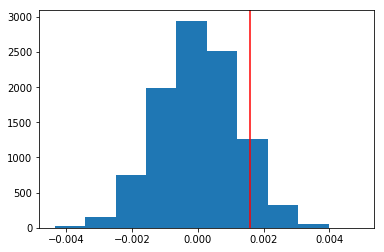

In [75]:
p_diff = np.array(diffs)
plt.hist(p_diff);
plt.axvline(x = ab_data_diff, color = 'r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [76]:
p_value = (p_diff < ab_data_diff).mean()

p_value


0.9044

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value computed was the p_value, a conditional probability given that the null hypothesis is true, and the value indicated that the null hypothesis has failed to be rejected because the value is above 0.05. In other words, the new page converts greater rate than the old page.  **



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [77]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"').converted.sum()
convert_new = df2.query('landing_page == "new_page"').converted.sum()
n_old = df2.query('landing_page == "old_page"').landing_page.count()
n_new = df2.query('landing_page == "new_page"').landing_page.count()


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [79]:
z_score, p_val = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')

('p-value:',p_val,'z-score:', z_score)

('p-value:', 0.905173705140591, 'z-score:', 1.3116075339133115)

In [102]:
from scipy.stats import norm
norm.cdf(z_score), norm.ppf(1 - (0.05/2))

(0.905173705140591, 1.959963984540054)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

** The z-score and p-value values indicate that the null hypothesis failed to be rejected. The p-value is technically the same as the p-value computed in parts j-k but the sm.stats.porportions function computes 2-tail t test( assuming the null hypothesis: p_new = p_old, Alt hypothesis: p_new != p_old). I've computed the p-value for one-tail(null hypothesis: p_new <= p_old) t test below.**

In [80]:
z_score, p_val = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')

( 'p-value:', p_val, 'z-score:', z_score)

('p-value:', 0.905173705140591, 'z-score:', 1.3116075339133115)

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?



**A logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [107]:
df2['intercept'] = 1
df2[['ab_page', 'ab_page_2']] = pd.get_dummies(df2['landing_page'])
df2 = df2.drop(columns = ['ab_page_2'], axis = 1)

df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [108]:
log_lm = sm.Logit(df2['converted'], df2[['ab_page', 'intercept']])
results = log_lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Mon, 30 Jul 2018   Pseudo R-squ.:               8.085e-06
Time:                        11:31:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [110]:
ab_page = np.exp(-0.0155)
intercept = np.exp(-1.9879)

(ab_page, intercept,)

(0.9846195067517329, 0.13698278746347278, 1.2092495976572515)

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p_value associated with the ab_page was 0.19. The reason it differs from Part II has been already described. The logistic regression summary assumes a 2-tailed t test. The results indicated that there is no relationship between the types of page and the conversion rate. **

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**The above results have not helped to determine the potential reason for the page converts and adding other factors might clarify the problem. However, the concern for adding more factors is multicollinearity.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns. Provide the statistical output as well as a written response to answer this question.

In [125]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [136]:
### Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new.drop(columns = ['UK'], axis = 1, inplace = True)

lm = sm.Logit(df_new['converted'], df_new[['US', 'CA', 'intercept']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Mon, 30 Jul 2018   Pseudo R-squ.:               1.521e-05
Time:                        12:27:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
==============================================================================
"""

In [138]:
np.exp(-.0099), np.exp(-.0507)

(0.9901488436829572, 0.9505637969004034)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [139]:
### Fit Your Linear Model And Obtain the Results
df_new[['ab_page', 'ab_page_2']] = pd.get_dummies(df_new['landing_page'])
df_new = df_new.drop(columns = ['ab_page_2'], axis = 1)

lm = sm.Logit(df_new['converted'], df_new[['US', 'CA','ab_page', 'intercept']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Mon, 30 Jul 2018   Pseudo R-squ.:               2.324e-05
Time:                        12:32:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
US            -0.0099      0.013     -0.744      0.457      -0.036       0.016
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
intercept     -1.9794      0.013   -155.414      0.000      -2.004      -1.954
==============================================================================
"""

**Conclusion**


** Part II indicated that the null hypothesis failed to be rejected in that the mean conversion rate for new page was less than or equal to the mean conversion rate for the old page. Part III described the results with a linear regression approach. The null hypothesis for linear regression is described as the mean conversion rate of new page in equal to the mean conversion rate of the old page. The null hypothesis for Part III failed to be rejected. **


**The final two steps under Part III was to understand if any correlation existed between countries and conversion rate, and between countries, page and converstion rates. The results concluded that no relationship exsited between the former or ladder, respectively.**

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 
